1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit is: 0


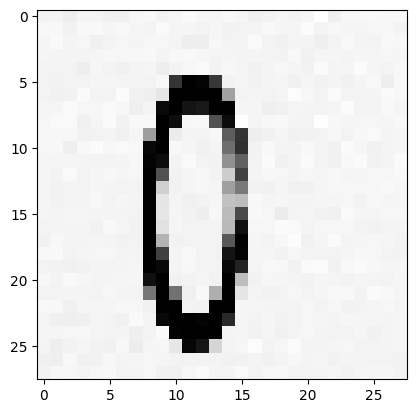

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit is: 1


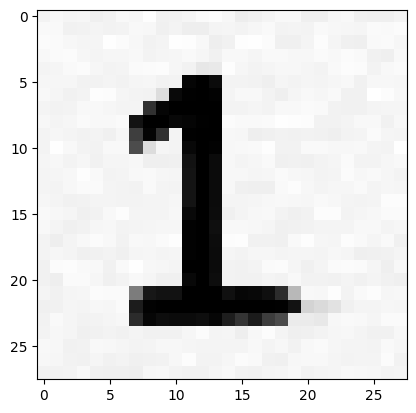

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted digit is: 2


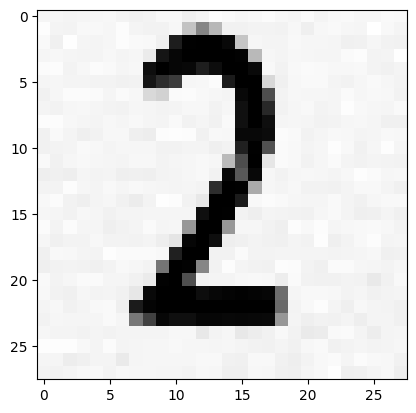

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit is: 3


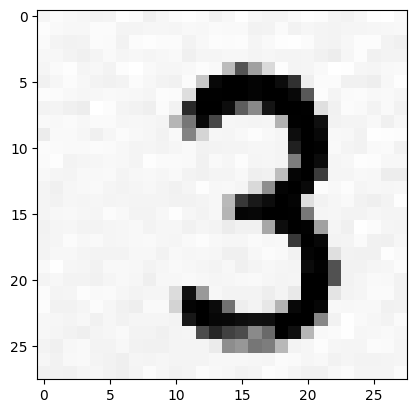

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted digit is: 4


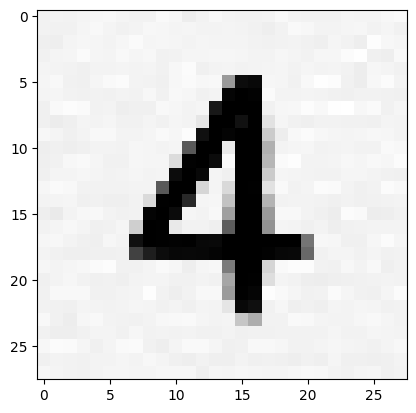

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted digit is: 5


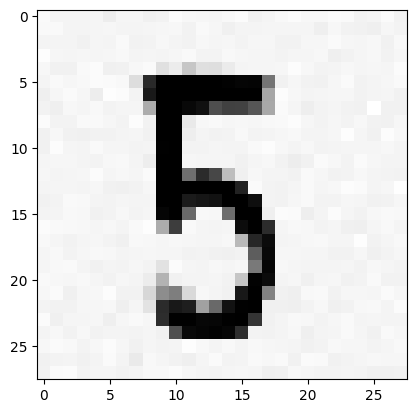

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit is: 6


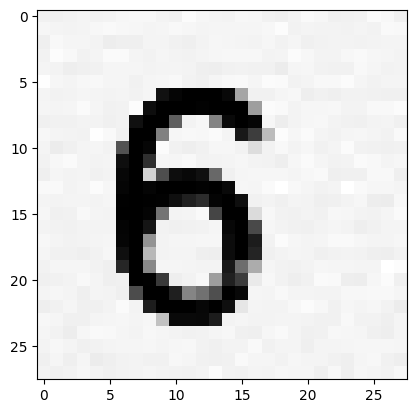

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted digit is: 7


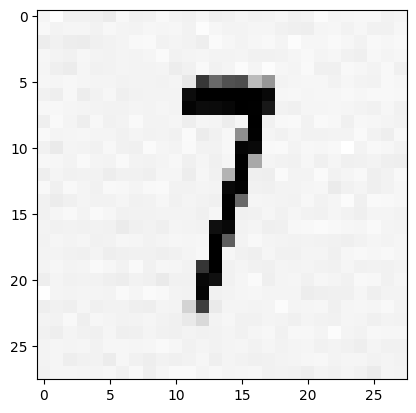

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit is: 8


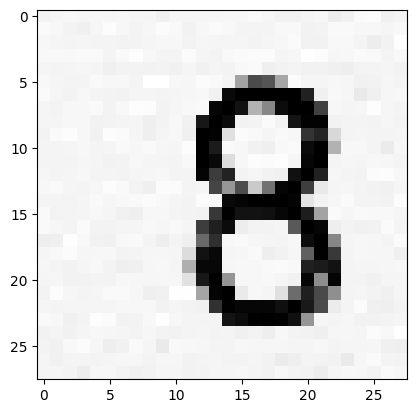

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted digit is: 9


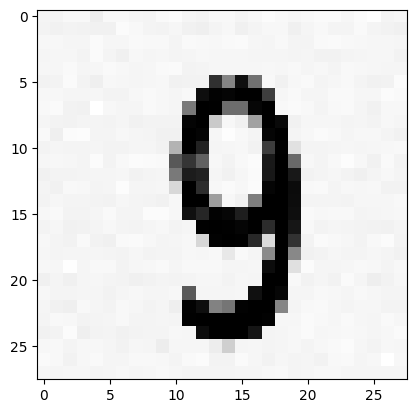

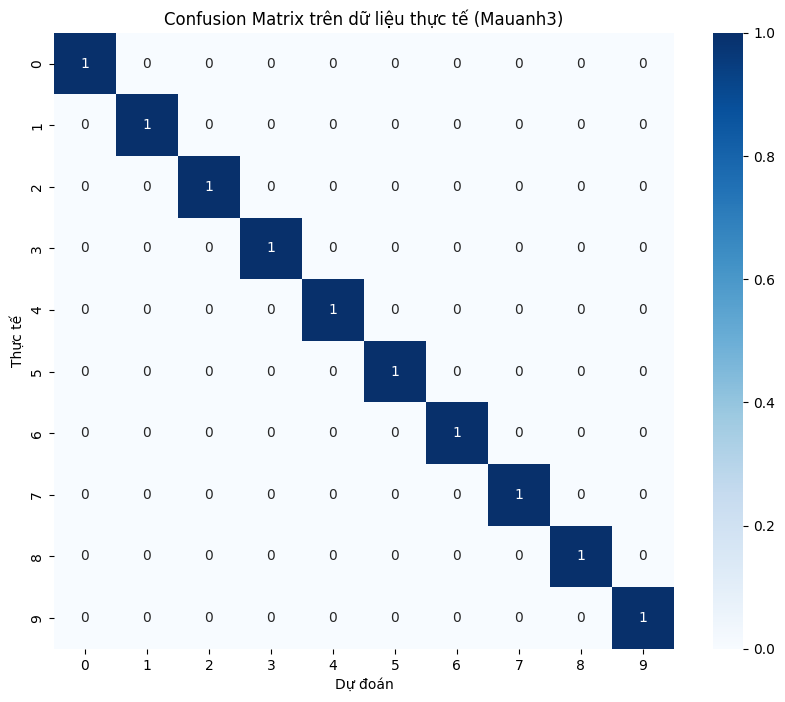

No retraining needed, all predictions were correct.


In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_retrain = []
y_retrain = []
model = tf.keras.models.load_model('../handwritten_digits.keras',
                                   custom_objects={'softmax_v2': tf.keras.activations.softmax})
image_number = 0
# Danh sách để lưu trữ nhãn thực tế và dự đoán
true_labels = []
pred_labels = []

while os.path.isfile("../Mauanh3/{0}.png".format(image_number)):
    try:
        img = cv2.imread("../Mauanh3/{0}.png".format(image_number))[:, :, 0]
        img = cv2.resize(img, (28, 28))  # Kích thước chuẩn của MNIST
        img = np.invert(np.array([img]))
        
        # Dự đoán
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)
        true_digit = image_number  # Nhãn đúng từ tên file
        print("Predicted digit is:", np.argmax(prediction))
        
        # Lưu nhãn thực tế và dự đoán
        true_labels.append(true_digit)
        pred_labels.append(predicted_digit)
        
        # Nếu dự đoán sai, thêm vào tập huấn luyện lại
        if predicted_digit != true_digit:
            print(f"Wrong prediction for {image_number}.png, adding to retraining set.")
            X_retrain.append(img[0])  # Thêm ảnh
            y_retrain.append(true_digit)  # Thêm nhãn
            
        
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error occurred on image {0}".format(image_number))
    finally:
        image_number = image_number + 1
        # Hiển thị confusion matrix cho dữ liệu thực tế
if true_labels:  # Kiểm tra xem có dữ liệu để vẽ không
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix trên dữ liệu thực tế (Mauanh3)')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.show()
# Nếu có dữ liệu cần huấn luyện lại
if X_retrain:
    X_retrain = np.array(X_retrain)
    y_retrain = np.array(y_retrain)
    X_retrain = tf.keras.utils.normalize(X_retrain, axis=1)
    X_retrain = X_retrain[..., np.newaxis] 
    # Huấn luyện lại mô hình
    model.fit(X_retrain, y_retrain, epochs=5,validation_data=(X_retrain, y_retrain))
    print("Model retrained with new data.")
    model.save('../handwritten_digits.keras')
else:
    print("No retraining needed, all predictions were correct.")

In [10]:
# Plotting accuracy and loss
# Accuracy plot

# Kiểm tra lịch sử huấn luyện trước khi vẽ biểu đồ
if hasattr(model, 'history') and model.history.history:
    history = model.history.history

    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.get('accuracy', []), label='Training Accuracy')
    plt.plot(history.get('val_accuracy', []), label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.get('loss', []), label='Training Loss')
    plt.plot(history.get('val_loss', []), label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
else:
    print("No training history available.")

No training history available.
